# Quantum Generative Adversarial Networks

## Introduction

Generative [adversarial](gloss:adversarial) networks (GANs) [[1]](https://arxiv.org/abs/1406.2661) have swiftly risen to prominence as one of the most widely-adopted methods for unsupervised learning, with showcased abilities in photo-realistic image generation. Given the success of classical GANs, a natural question is whether this success will translate into a quantum computing GAN. In this page, we explore the theory behind quantum generative adversarial networks (QGANs), as well as the practice of implementing one in Qiskit to learn a [Gaussian distribution](gloss:gaussian-distribution). Lastly, we end off with a discussion around the potential use cases of quantum generative adversarial networks and link to relevant research for those who want to read further.

## Classical generative models (theory)

### Generative models

Until recently, the success of supervised learning models has completely overshadowed their generative counterparts. So much so, that the popularity of these supervised models might make it difficult to even conceptualize another approach to machine learning.

The supervised approach, which feels intuitive to us by now, tries to make accurate predictions on new data, demonstrating that it has learned some underlying relations of the dataset. Generative models are different. Instead of focusing on key relationships between input data and labels, they learn to model the underlying distribution holistically, allowing it to generate new data samples. It's the difference between telling apart cats and dogs, and generating completely new images of cats and dogs. The latter is a richer, but also more difficult task.

Why is it more difficult? Adequately discriminating between given data can often be achieved through picking up on a few tell-tale features (like whiskers don't belong on eyes) which help form the strong decision boundaries in the high dimensional space. Consequently, machine learning researchers take great interest in generative models as these learning tasks seem to stab at a deeper notion of learning—trying to reproduce the underlying *creator* function.

So given a pool of training data, the goal of a generative model is to learn/reproduce the probability distribution that generated them. A particularly eye-catching application of GANs is generating [high-resolution visuals](https://thispersondoesnotexist.com/) or [composing music](https://magenta.tensorflow.org/gansynth). Below is a generated image of a fake cat.

![computer-generated image of a cat](https://thiscatdoesnotexist.com)

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="qml-qgan-0") -->

<!-- ::: .question -->

What would be the most appropriate learning task for a generative model?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. Producing images of handwritten digits

<!-- ::: -->

<!-- ::: .option -->

2. Classifying incoming emails as 'spam' or 'not spam'

<!-- ::: -->

<!-- ::: .option -->

3. Predicting stock prices

<!-- ::: -->

<!-- ::: .option -->

4. Recommending optimal movies

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

### Generative adversarial networks
A particular class of generative models—generative adversarial networks (GANs)—have witnessed a boom in popularity since they were first proposed in 2014 by Goodfellow I., *et al.* [[1]](https://arxiv.org/abs/1406.2661). To understand the quantum analogue, we first briefly discuss the concept behind classical generative adversarial networks.

Briefly put, GANs use a pair of neural networks pitted against each other—the generator and the discriminator.

### The generator

The generator's primary aim is to create fake data samples that are convincing enough for the discriminator to label them as real. With each training step, the generator improves at this, until it has near complete overlap  to the fixed distribution of real data.

To allow the generator to explore a rich space of output non-deterministically, a random noise vector drawn from a [latent space](gloss:latent-space) is fed into the generator as input (usually sampled from a Gaussian distribution). The generator succeeds once it learns to map most points in the latent space (Gaussian noise) onto convincing fake data samples fitting the real distribution.

*At the start of training, the latent space is a meaningless n-dimensional Gaussian distribution. But, as the generator evolves, the generator learns to map the noise vectors in the latent space to valid data in the objective dataset.*

### The discriminator

The discriminator receives data samples from both the generator and the real distribution (not knowing which is which), and its task is to correctly classify the input data samples as fake or real.

Note how the discriminator's objective is directly opposed to its' counterpart. While the discriminator tries to minimize the probability of misclassifying the fake data as real, the generator tries to maximize it.
![Flowchart of a generative adversarial network](images/qgan/gan_general_flow.svg)

### Convergence

The GAN finishes training once the generator consistently generates convincing data samples indistinguishable to the real data distribution, leaving the discriminator unable to reasonably decipher between the two. Formally, this point is referred to as the Nash equilibrium (from game theory), at which the generator produces data that corresponds to the real probability distribution, and the *trained* discriminator resorts to guessing between fake or real (50% accuracy).

A common analogy between GANs and art theft brings the concept into frame. The generator is often seen as a fake artist trying to produce paintings identical to those found in the museum. The art expert's objective (discriminator) is to tell apart the generator's fake art from the real art.
Applied to this analogy, the discriminator assesses the paintings' authenticity while the generator creates the best fakes to fool it. The zero-sum game pushes the two networks to constantly one-up each other. Each improvement of the generator in creating convincing data, is bested by the discriminator's update in improved classification, and vice versa.

![gan_analogy](images/qgan/gan_analogy.png)

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="qml-qgan-1") -->

<!-- ::: .question -->

Once the GAN reaches Nash Equilibrium...

<!-- ::: -->

<!-- ::: .option(correct) -->

1. The discriminator randomly guesses fake/real with equal probability

<!-- ::: -->

<!-- ::: .option -->

2. The generator returns to producing noise

<!-- ::: -->

<!-- ::: .option -->

3. The GAN reaches a common failure mode, and the training process must be restarted

<!-- ::: -->

<!-- ::: .option -->

4. The discriminator guesses that all samples are real

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Quantum Generative Adversarial Networks (theory)

In 2018, two companion papers (Ref. [[2]](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.012324), [[3]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502)) brought the idea of GANs to the quantum domain. On a high level, quantum generative adversarial networks (QGANs) equip either the discriminator, the generator, or both with [parameterized quantum circuits](./paramterized-quantum-circuits) with the goal of learning some quantum or classical data. In this chapter, we discuss the fully quantum version of QGANs (quantum generator, quantum discriminator), keeping in mind that the broader principles apply across other types of QGANs.

![QGAN past work landscape](images/qgan/past_work_landscape.svg)
Image from Ref. [5](https://arxiv.org/abs/1901.00848)

There are many analogous concepts, specifically with the adversarial training, between GANs and QGANs. Most importantly, the training structure of GANs largely persists to QGANs. We alternately train the generator & discriminator circuit parameters, while freezing the other's parameters. Through this, the quantum generator learns the target quantum state by proxy of the discriminator's signals, similar to GANs. It's proven that the [stable equilibrium](https://en.wikipedia.org/wiki/Nash_equilibrium) of the quantum adversarial game also occurs when the generator produces data identical to a target distribution [[3]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502).

The objective with a fully quantum QGAN is for the quantum generator to reproduce a desired state $|\psi\rangle$, using of course an adversarial training strategy. Similar to other variational quantum algorithms, the quantum generator moves towards this through an iterative update to its parameters directed by a classical optimizer. However, in the case of a QGAN, the generator's cost function landscape itself evolves and becomes better as the discriminator improves at recognizing real samples. Let's look at the general circuit schematics of what we will be building.

![real_rig](images/qgan/real_rig.svg)

![fake_rig](images/qgan/fake_rig.svg)

It is worth noting that although we only consider one register each for both the generator and discriminator, we could also add an [auxiliary](gloss:auxiliary) "workspace" register to both the generator and discriminator. 

The two circuits illustrated above show the generator concatenated with the discriminator and the unitary loading the target data concatenated with the discriminator.

The discriminator acts on the output from the generator, respectively, the target data unitary, as well as an additional qubit $|0\rangle$. Finally, the discriminator classification takes place by measuring the last qubit. If the outcome corresponds to $|0\rangle$ respectively $|1\rangle$ the input data is being classified as real or fake respectively.

Looking at the first circuit diagram shows us how real data samples are fed into the discriminator. Since we are dealing with a fully quantum QGAN, we need to somehow encode this data of ours into a quantum state to feed into the discriminator. To that end, we prepare the real data through a unitary $\class{u-sub-r}{U_R}$ such that we define:

$$|\text{Data}_R\rangle= U_R|0\rangle^{\otimes n}$$

which is then fed to the parameterized discriminator $\class{u-sub-d}{U}_{D(\class{theta-d}{\vec{\theta_D}})}$ (possibly containing an auxiliary register), and then measured to arrive at the discriminator's score on real data.
It is worth noting that $U_{D(\class{theta-d}{\vec{\theta_D}})}$ contains several 2-qubit entangling gates to "transmit" relevant features of the real data to the discriminator's register (workspace). Formalized, the unitary evolution is:

$$\class{u-sub-d}{U}_{D(\class{theta-d}{\vec{\theta_D}})}(|\text{Data}_R\rangle \otimes |0\rangle)$$

where $\class{theta-d}{\vec{\theta_D}}$ is the parameter vector that is updated through a classical optimizer to minimize the [expectation value](gloss:expectation-value) of the last qubit (equivalent to maximizing the probability of the discriminator classifying real data as $|\text{real}\rangle$).

In the second circuit, a generated [wave function](gloss:wave-function) aimed to mimic the real one is fed into the discriminator. In other words, the fake quantum state prepared by $U_{G(\class{theta-g}{\vec{\theta_G}})}$, parameterized by $\class{theta-g}{\vec{\theta_G}}$, is applied on the initial state $|0^{\otimes n}\rangle$, giving us:

$$|\text{Data}_G\rangle = U_{G(\class{theta-g}{\vec{\theta_G}})}|0^{\otimes n}\rangle$$

`{latex}|\text{Data}_G\rangle` is then fed to the discriminator parameterized by `{latex}\class{theta-d}{\vec{\theta_D}}`. So taking the expectation value of the observable `{latex}I^{\otimes n}Z` on `{latex}U_{D(\class{theta-d}{\vec{\theta_D}})}(|\text{Data}_G\rangle  \otimes |0\rangle)` gives us the discriminator's score on fake data. 

It is worth reiterating that $\langle \text{fake} | Z  | \text{fake} \rangle = 1$, meaning the discriminator "believes" a given sample to be wholly fake, the expectation value $Z$ with respect to the last qubit will be equal to 1. It then follows naturally that the discriminator would want to correctly "assign" $|0\rangle$ to fake samples and $|1\rangle$ to real samples. The inverse is true for the generator. For it, the optimal scenario would be if the discriminator was completely convinced that its generated quantum state was real, thereby assigning it a $|1\rangle$. We can formalize these adversarial incentives into the following [minimax](gloss:minimax) decision rule (adapted from [reference 2](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.012324)):

$$\underset{\class{theta-g}{\vec{\theta_G}}}{\min}\underset{\class{theta-d}{\vec{\theta_D}}}{\max}
\hspace{3pt} \Bigg(\class{pr}{\text{Pr}}\bigg(\class{d-disc}{D}(\class{theta-d}{\vec{\theta_D}}, R) = |\text{real}\rangle\bigg) +  \hspace{2pt} \class{pr}{\text{Pr}}\bigg(\class{d-disc}{D}(\class{theta-d}{\vec{\theta_D}}, G(\class{theta-g}{\vec{\theta_G}})) = |\text{fake}\rangle\bigg)\Bigg)$$

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="qml-qgan-2") -->

<!-- ::: .question -->

Quiz question: How do we obtain the probability of a given data sample being real, as assigned by the discriminator? Let $\langle Z \rangle$ be the expectation value of $Z$ with respect to the last qubit.

<!-- ::: -->

<!-- ::: .option -->

1. $\langle Z\rangle + 1$

<!-- ::: -->

<!-- ::: .option -->

2. $\langle Z\rangle + 1/2$

<!-- ::: -->

<!-- ::: .option(correct) -->

3. $\frac{\langle Z \rangle + 1}{2}$

<!-- ::: -->

<!-- ::: .option -->

4. $2^{\langle Z \rangle}$

<!-- ::: -->

<!-- ::: -->

Hint: the Z-expectation value is bounded between $[-1, 1]$

<!-- ::: -->

## Full implementation I

### Learning a 2 qubit Bell state

Equipped with the adequate theoretical foundation, we can now build an actual QGAN to learn the 2 qubit Bell state through Qiskit! First, we import the standard libraries.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

### Defining the real distribution

The 2 qubit Bell state is a maximally entangled quantum state, the specific state vector we're interested to reproduce is
$|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $
Which can be constructed by applying a CNOT gate followed by a Hadamard.

In [2]:
# Number of qubits needed to model real distribution
REAL_DIST_NQUBITS = 2
real_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_circuit.h(0)
real_circuit.cx(0, 1);

<!--- TODO: Widget: mini composer Have them compose Bell state of interest defined above. Stops when constructs properly --->

### Defining the variational quantum generator and discriminator

We now define the generator ansatz.

Given the primal nature of existing research into QGANs, the community has not yet settled into any optimal generator or discriminator ansatzes. On that note, most of the [hyperparameters](gloss:hyperparameter) chosen in quantum machine learning are still driven by loose [heuristics](gloss:heuristics), and there's a lot still to be explored.

It's worth mentioning that whichever ansatz we choose for the generator, it must have enough [capacity](gloss:capacity) and be [expressible](gloss:expressible) enough to fully reproduce the real quantum state $|\psi\rangle$ defined earlier. So, although the ansatz used here is a little arbitrary, we are confident that it is plenty expressive for the Bell state we are trying to model.

In [3]:
# Import qiskit machine learning parameters
from qiskit.circuit import ParameterVector

Here, we use the `TwoLocal` class to create an ansatz for the variational quantum generator with single qubit gates $RY$ and $RZ$, paired with the entangling gate $CZ$.

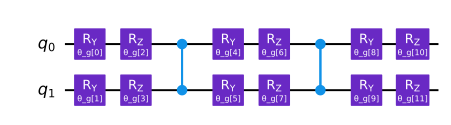

In [4]:
from qiskit.circuit.library import TwoLocal
generator = TwoLocal(REAL_DIST_NQUBITS,
                     # Parameterized single qubit rotations
                     ['ry', 'rz'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure: all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g',
                     name='Generator')
generator = generator.decompose() # decompose into standard gates
generator.draw()

### Variational quantum discriminator

We now define the ansatz for the discriminator. In this case, instead of using [`TwoLocal`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html#qiskit.circuit.library.TwoLocal), we create a custom ansatz with a [`ParameterVector`](https://qiskit.org/documentation/stubs/qiskit.circuit.ParameterVector.html).

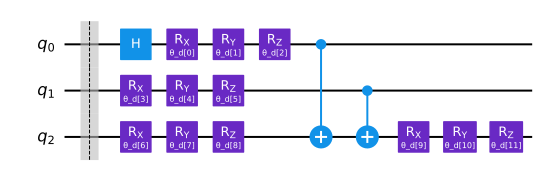

In [5]:
disc_weights = ParameterVector('θ_d', 12)
discriminator = QuantumCircuit(3, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)
discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)
discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(0, 2)
discriminator.cx(1, 2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)
discriminator.draw()

### Compiling the QGAN

With all our components in place, we now construct the two circuits forming the QGAN. The first feeds generated quantum state into the discriminator and the second is comprised of the discriminator applied on the real state. *It is easy to see how this circuit fulfills the general schematic we outlined earlier.*

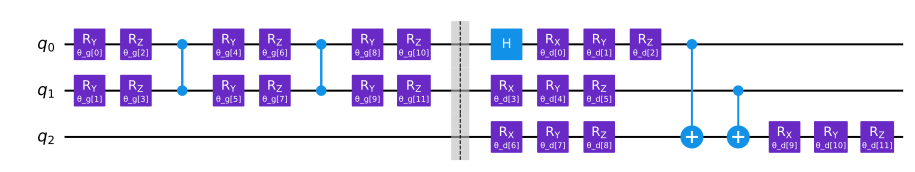

In [6]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters
# Need extra qubit for the discriminator
gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)
gen_disc_circuit.draw()

A natural question to ask at this point is: why isn't there any noise fed into the generator? As you may recall, in the classical GAN, the latent space was an essential ingredient. If there was no noise for the classical GAN, then it would be impossible for the generator to represent a complete distribution since with each update to its parameters, it would be restricted to output one sample given its deterministic nature. But consider, that in the quantum case, since we are feeding the whole 'fake' wave function directly to the discriminator, the role that noise would play is much less obvious. With or without noise, the variational quantum generator is capable of directly modelling the wave function of interest, so long as the ansatz is of adequate capacity.

With that said, there may still be benefits to equipping the variational quantum generator with a latent space of its own. In fact, [reference 5](https://arxiv.org/abs/1901.00848) presents a method to allow the quantum generator to model continuous distributions using a latent space as input. But to keep it simple, we will still omit feeding noise into the variational quantum generator.

Below, we define the parameterized circuit linking the target distribution with the variational discriminator.

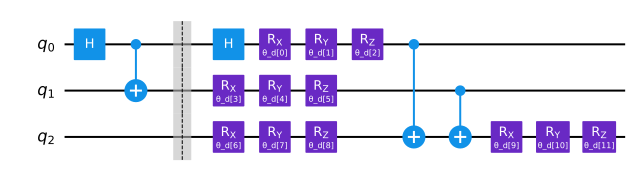

In [7]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw()

### Constructing the cost function

Remember the minimax decision rule we formulated earlier,

$$\underset{\class{theta-g}{\vec{\theta_G}}}{\min}\underset{\class{theta-d}{\vec{\theta_D}}}{\max}
\hspace{3pt} \Bigg(\class{pr}{\text{Pr}}\bigg(\class{d-theta}{D(\class{theta-d}{\vec{\theta_D}}, R)} = |\text{real}\rangle\bigg) +  \hspace{2pt} \class{pr}{\text{Pr}}\bigg(D(\class{theta-d}{\vec{\theta_D}}, G(\class{theta-g}{\vec{\theta_G}})) = |\text{fake}\rangle\bigg)\Bigg)$$

Constructing a loss function for both the discriminator and generator is now trivial. Starting with the discriminator, we have

$$\text{Cost}_D = \class{pr}{\text{Pr}}\bigg(D(\class{theta-d}{\vec{\theta_D}}, G(\class{theta-g}{\vec{\theta_G}})) = |\text{real}\rangle\bigg) - \class{pr}{\text{Pr}}\bigg(D(\class{theta-d}{\vec{\theta_D}}, R) = |\text{real}\rangle\bigg)$$.

Minimizing this entails maximizing the probability of correctly classifying real data while minimizing the probability of mistakenly classifying fake data.
As a hallmark of vanilla GANs, the generator’s cost function will simply be the negation of the discriminator’s cost, where the optimal strategy is to maximize the probability of the discriminator misclassifying fake data. We omit the term concerning the real quantum state since the generator's weights leave no effect on it.

$$\text{Cost}_G =  - \class{pr}{\text{Pr}}\bigg(D(\class{theta-d}{\vec{\theta_D}}, G(\class{theta-g}{\vec{\theta_G}})) = |\text{real}\rangle\bigg)$$

We now implement the above cost functions. Note that after accessing the respective probabilities of each basis state, we arrive at the total probability of a given sample being classified as $|\text{real}\rangle = |1\rangle$ by summing over each basis state that satisfies $|XX1\rangle$ (any state with last qubit measured as $|1\rangle$). However, do note the reverse ordering given Qiskit's [endian](gloss:endian) resulting in $|1XX\rangle$.

In [8]:
# We'll use Statevector to retrieve statevector of given circuit
from qiskit.quantum_info import Statevector
import tensorflow as tf

def generator_cost(gen_params):
    """Generator cost function for the optimizer to minimize."""
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    state_probs = Statevector(gen_disc_circuit
                              .bind_parameters(curr_params)
                             ).probabilities()
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(state_probs[0b100:])
    cost = -prob_fake_true
    return cost

def discriminator_cost(disc_params):
    """Discriminator cost function for the optimizer to minimize."""
    # .numpy() method extracts numpy array from TF tensor
    curr_params = np.append(disc_params.numpy(),
                            gen_params.numpy())
    gendisc_probs = Statevector(gen_disc_circuit
                                .bind_parameters(curr_params)
                               ).probabilities()
    realdisc_probs = Statevector(real_disc_circuit.
                                 bind_parameters(disc_params.numpy())
                                ).probabilities()
    # Get total prob of measuring |1> on q2
    prob_fake_true = np.sum(gendisc_probs[0b100:])
    # Get total prob of measuring |1> on q2
    prob_real_true = np.sum(realdisc_probs[0b100:])
    cost = prob_fake_true - prob_real_true
    return cost

We now define a helper function to calculate the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between the model and target distribution. This is a common metric used to track the generator's progress while training since it effectively measures the distance between two distributions. A lower KL divergence indicates that the two distributions are similar, with a KL of 0 implying equivalence.

In [9]:
def calculate_kl_div(model_distribution: dict, target_distribution: dict):
    """Gauge model performance using Kullback Leibler Divergence"""
    kl_div = 0
    for bitstring, p_data in target_distribution.items():
        if np.isclose(p_data, 0, atol=1e-8):
            continue
        if bitstring in model_distribution.keys():
            kl_div += (p_data * np.log(p_data)
                 - p_data * np.log(model_distribution[bitstring]))
        else:
            kl_div += p_data * np.log(p_data) - p_data * np.log(1e-6)
    return kl_div

### CircuitQNN

For simplicity, we use the [`CircuitQNN`](https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.neural_networks.CircuitQNN.html) that compiles the parameterized circuit and handles calculation of the gradient recipes. Calling the `forward()` method also directly outputs the probability state vectors of the circuit.

In [10]:
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.neural_networks import CircuitQNN

# define quantum instances (statevector and sample based)
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))

# specify QNN to update generator weights
gen_qnn = CircuitQNN(gen_disc_circuit,  # parameterized circuit
                     # frozen input arguements (discriminator weights)
                     gen_disc_circuit.parameters[:N_DPARAMS],
                     # differentiable weights (generator weights)
                     gen_disc_circuit.parameters[N_DPARAMS:],
                     sparse=True, # returns sparse probability vector
                     quantum_instance=qi_sv)

# specify QNNs to update discriminator weights
disc_fake_qnn = CircuitQNN(gen_disc_circuit, # parameterized circuit
                           # frozen input arguments (generator weights)
                           gen_disc_circuit.parameters[N_DPARAMS:],
                           # differentiable weights (discrim. weights)
                           gen_disc_circuit.parameters[:N_DPARAMS],
                           sparse=True, # get sparse probability vector
                           quantum_instance=qi_sv)

disc_real_qnn = CircuitQNN(real_disc_circuit, # parameterized circuit
                           [], # no input parameters
                           # differentiable weights (discrim. weights)
                           gen_disc_circuit.parameters[:N_DPARAMS],
                           sparse=True, # get sparse probability vector
                           quantum_instance=qi_sv)

Here, we use [TensorFlow Keras](gloss:tensorflow-keras) to create an ADAM optimizer instance for both the generator and the discriminator. The ADAM optimizer is a widely-used optimizer in classical machine learning that uses momentum-based gradient updates. It is known to far outperform vanilla gradient descent.

To use the Keras optimizer, we must store the weights as TF variables, which can be easily done through the `tf.Variable` method. We convert back into a `np.ndarray` using the `.numpy()` instance method on the `tf.Variable`.

In [11]:
import tensorflow as tf
import pickle # to serialize and deserialize variables
# Initialize parameters
init_gen_params = np.random.uniform(low=-np.pi,
                                    high=np.pi,
                                    size=(N_GPARAMS,))
init_disc_params = np.random.uniform(low=-np.pi,
                                     high=np.pi,
                                     size=(N_DPARAMS,))
gen_params = tf.Variable(init_gen_params)
disc_params = tf.Variable(init_disc_params)

Let's look at our starting point for the generator created from  random weights.

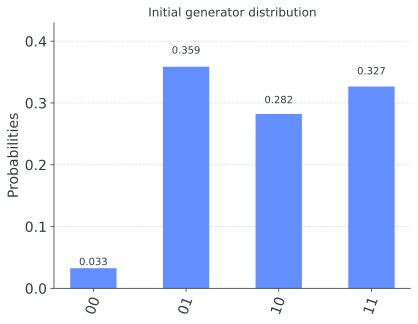

In [12]:
init_gen_circuit = generator.bind_parameters(init_gen_params)
init_prob_dict = Statevector(init_gen_circuit).probabilities_dict()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, 1, sharey=True)
ax1.set_title("Initial generator distribution")
plot_histogram(init_prob_dict, ax=ax1)

In [13]:
# Initialize Adam optimizer from Keras
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

### Training

In [14]:
# Initialize variables to track metrics while training
best_gen_params = tf.Variable(init_gen_params)
gloss = []
dloss = []
kl_div = []

There are a few important points on the following training logic:

1. The discriminator's weights are updated fivefold for each generator update. When dealing with classical GANs, it's also not uncommon to see an unbalanced number of training steps between the two networks. In this case, we arrive at a 5:1 ratio as a best practice through trial and error.

2. The `backward()` method of `CircuitQNN` returns the gradients with respect to each weight for each basis state for each batch. In other words, the return shape of `CircuitQNN.backward(...)[1].todense()` is `(num_batches, num_basis_states, num_weights)`. So to arrive at the gradient for $\text{Cost}_D$, we first sum over all the gradients for each basis state satisfying $|1XX\rangle$, and then subtract them according to the $\text{Cost}_D$ function. Recall that the linearity the derivative allows us to distribute it as implemented below.

3. Due to the instability of GAN training, we store the best generator parameters.

In [15]:
TABLE_HEADERS = "Epoch | Generator cost | Discriminator cost | KL Div. |"
print(TABLE_HEADERS)
for epoch in range(100):
    #--- Quantum discriminator parameter updates ---#
    D_STEPS = 5 # N discriminator updates per generator update
    for disc_train_step in range(D_STEPS):
        # Partial derivatives wrt θ_D
        d_fake = disc_fake_qnn.backward(gen_params, disc_params
                                       )[1].todense()[0, 0b100:]
        d_fake = np.sum(d_fake, axis=0)
        d_real = disc_real_qnn.backward([], disc_params
                                       )[1].todense()[0, 0b100:]
        d_real = np.sum(d_real, axis=0)
        # Recall Cost_D structure
        grad_dcost = [d_fake[i] - d_real[i] for i in range(N_DPARAMS)]
        grad_dcost = tf.convert_to_tensor(grad_dcost)
        # Update disc params with gradient
        discriminator_optimizer.apply_gradients(zip([grad_dcost],
                                                    [disc_params]))
        # Track discriminator loss
        if disc_train_step % D_STEPS == 0:
            dloss.append(discriminator_cost(disc_params))

    #--- Quantum generator parameter updates ---#
    for gen_train_step in range(1):
        # Compute partial derivatives of prob(fake|true) wrt each
        # generator weight
        grads = gen_qnn.backward(disc_params, gen_params)
        grads = grads[1].todense()[0][0b100:]
        # Recall Cost_G structure and the linearity of
        # the derivative operation
        grads = -np.sum(grads, axis=0)
        grads = tf.convert_to_tensor(grads)
        # Update gen params with gradient
        generator_optimizer.apply_gradients(zip([grads], [gen_params]))
        gloss.append(generator_cost(gen_params))

    #--- Track KL and save best performing generator weights ---#
    # Create test circuit with updated gen parameters
    gen_checkpoint_circuit = generator.bind_parameters(gen_params.numpy())
    # Retrieve probability distribution of current generator
    gen_prob_dict = Statevector(gen_checkpoint_circuit
                               ).probabilities_dict()
    # Constant real probability distribution
    real_prob_dict = Statevector(real_circuit).probabilities_dict()
    current_kl = calculate_kl_div(gen_prob_dict, real_prob_dict)
    kl_div.append(current_kl)
    if np.min(kl_div) == current_kl:
        # New best
        # serialize & deserialize to simply ensure zero links
        best_gen_params = pickle.loads(pickle.dumps(gen_params))
    if epoch % 10 == 0:
        # print table every 10 epochs
        for header, val in zip(TABLE_HEADERS.split('|'),
                              (epoch, gloss[-1], dloss[-1], kl_div[-1])):
            print(f"{val:.3g} ".rjust(len(header)), end="|")
        print()

Epoch | Generator cost | Discriminator cost | KL Div. |


    0 |        -0.0789 |            -0.0989 |    1.73 |


   10 |         -0.263 |             -0.749 |    1.59 |


   20 |         -0.593 |             -0.418 |   0.729 |


   30 |         -0.663 |             -0.213 |   0.191 |


   40 |         -0.587 |             -0.141 |  0.0361 |


   50 |         -0.812 |             0.0698 |  0.0258 |


   60 |         -0.436 |             -0.283 |  0.0501 |


   70 |         -0.728 |             0.0648 |  0.0813 |


   80 |         -0.349 |             -0.301 |   0.117 |


   90 |         -0.555 |             -0.163 |  0.0948 |


### Results visualized

We plot the collected metrics to examine how the QGAN learned.

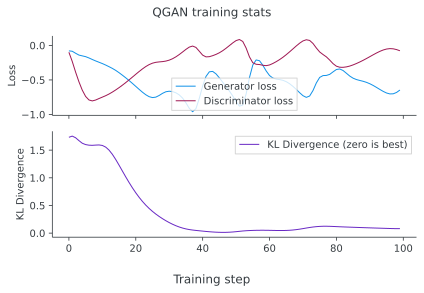

In [16]:
fig, (loss, kl) = plt.subplots(2, sharex=True,
                               gridspec_kw={'height_ratios': [0.75, 1]},
                               figsize=(6,4))
fig.suptitle('QGAN training stats')
fig.supxlabel('Training step')
loss.plot(range(len(gloss)), gloss, label="Generator loss")
loss.plot(range(len(dloss)), dloss, label="Discriminator loss",
          color="C3")
loss.legend()
loss.set(ylabel='Loss')
kl.plot(range(len(kl_div)), kl_div, label="KL Divergence (zero is best)",
        color="C1")
kl.set(ylabel='KL Divergence')
kl.legend()
fig.tight_layout();

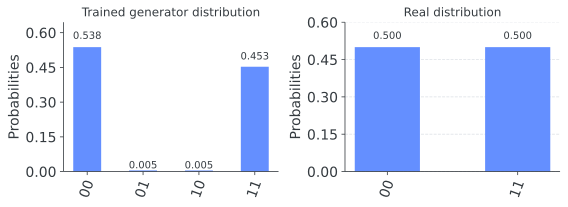

In [17]:
# Create test circuit with new parameters
gen_checkpoint_circuit = generator.bind_parameters(
    best_gen_params.numpy())
gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict()
real_prob_dict = Statevector(real_circuit).probabilities_dict() # constant
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
plot_histogram(gen_prob_dict, ax=ax1)
ax1.set_title("Trained generator distribution")
plot_histogram(real_prob_dict, ax=ax2)
ax2.set_title("Real distribution")
fig.tight_layout()

With just 100 [epoch](gloss:epoch)s, we see that the generator has approximated the Bell state $|\psi\rangle$ quite well!

Note that reproducing results from above may take a few runs. Due to the fragile nature of training two competing models at once, generative adversarial networks as a whole are notorious for failing to converge—and it is only amplified for QGANs given the lack of best practices. GANs (QGANs inclusive) often suffer from vanishing gradients, often caused by a discriminator that is too good.

Another drawback of the adversarial training structure—albeit less prevalent with fully quantum QGANs—is mode collapse, the failure mode of GANs when the generator and discriminator get caught in a cat and mouse chase. The generator spams a certain sample that has a tendency to fool the discriminator, to which the discriminator adapts to over time, but the generator swiftly follows up yet again with another sample. [Learn more on remedies to GAN failure modes](https://developers.google.com/machine-learning/gan/problems).

## Full implementation II

### Learning a normal distribution with OpFlowQNN

In the following section, we build a QGAN to learn a 3 qubit normal distribution, while changing a few previous methods along the way.
1. Learning a more complex distribution
2. Using [OpFlowQNN](gloss:opflowqnn) to retrieve expectation values directly
3. Amalgamating the discriminator output qubit to the generator's register

### Defining the real distribution

Here we define the real distribution using the `qiskit_finance` module and the generator ansatz that'll be used to model the [Gaussian](gloss:gaussian-distribution).

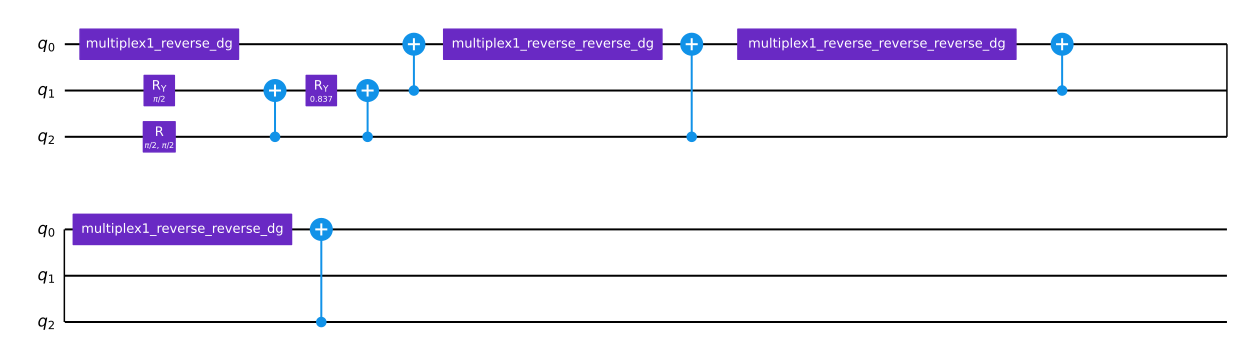

In [18]:
from qiskit_finance.circuit.library import NormalDistribution
REAL_DIST_NQUBITS = 3
real_circuit = NormalDistribution(REAL_DIST_NQUBITS, mu=0, sigma=0.15)
real_circuit = real_circuit.decompose().decompose().decompose()
real_circuit.draw()

### Defining the variational quantum discriminator and generator

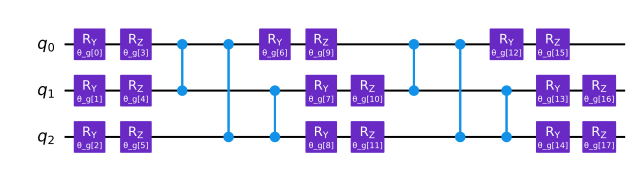

In [19]:
generator = TwoLocal(REAL_DIST_NQUBITS,
                     # Parameterized single qubit rotations
                     ['ry', 'rz'],
                     'cz',  # Entangling gate
                     'full', # Entanglement structure - all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g',
                     name='Generator')
generator = generator.decompose()
generator.draw()

Now, we define a similar ansatz as before for the discriminator, just with the output qubit defined on `q2` instead of `q3` as one might have expected from the previous example. It's important to note that the qubit used to measure $\class{}{\langle Z\rangle_{\text{out}}}$ is largely irrelevant since the discriminator ansatz can universally transform any given quantum state to a desired one. Previously, we defined the output qubit to be one a separate register to make it more intuitive but there exists no true justification with respect to QGAN performance.

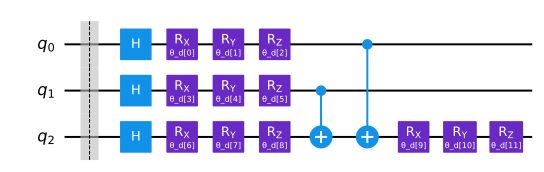

In [20]:
disc_weights = ParameterVector('θ_d', 12)
discriminator = QuantumCircuit(REAL_DIST_NQUBITS, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)
discriminator.h(1)
discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)
discriminator.h(2)
discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(1,2)
discriminator.cx(0,2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)
discriminator.draw()

Then we construct the complete circuits.

In [21]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

### Compiling the QGAN

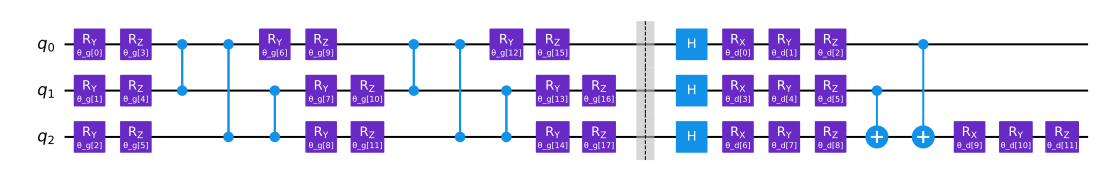

In [22]:
gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)
gen_disc_circuit.draw()

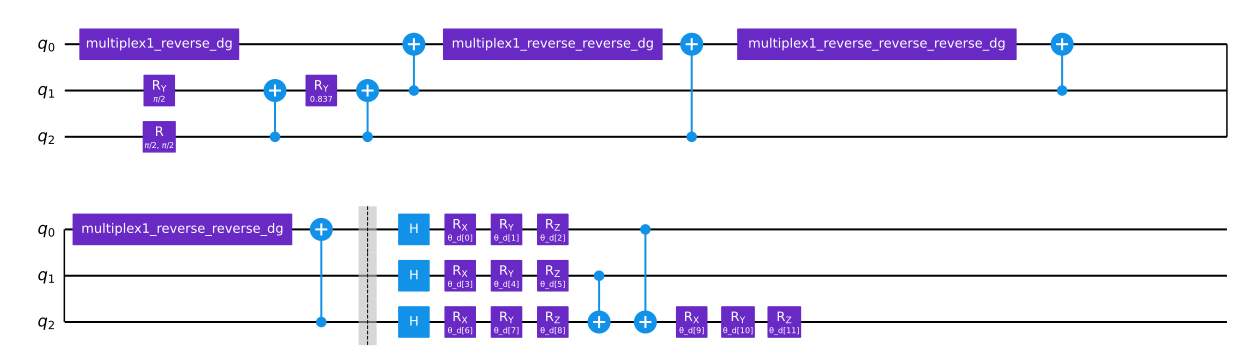

In [23]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw()

### OpflowQNN

We employ the [`OpflowQNN`](https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.neural_networks.OpflowQNN.html) from Qiskit which takes a (parameterized) operator and leverages Qiskit's gradient framework to complete the backward passes. The operator defined here is equivalent to the expectation value of $Z$ with respect to the last qubit.

In [24]:
from qiskit.opflow import (StateFn, PauliSumOp, Gradient,
                           AerPauliExpectation)
from qiskit_machine_learning.neural_networks import OpflowQNN
expval = AerPauliExpectation()  # method to calculcate expectation values
gradient = Gradient()
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))
# Circuit wave function
gen_disc_sfn = StateFn(gen_disc_circuit)
real_disc_sfn = StateFn(real_disc_circuit)
# construct operator to retrieve Pauli Z expval of the last qubit
H1 = StateFn(PauliSumOp.from_list([('ZII', 1.0)]))
# combine operator and circuit to objective function
gendisc_op = ~H1 @ gen_disc_sfn
realdisc_op = ~H1  @ real_disc_sfn

In [25]:
# construct OpflowQNN with the two operators, the input parameters,
# the weight parameters, the expected value, and quantum instance.
# |fake> => |0> => 1 ; |real> => |1> => -1
gen_opqnn = OpflowQNN(gendisc_op,
                      # input parameters (discriminator weights)
                      gen_disc_circuit.parameters[:N_DPARAMS],
                      # differentiable weights (generator weights)
                      gen_disc_circuit.parameters[N_DPARAMS:],
                      expval,
                      gradient,
                      qi_sv) # gen wants to to minimize this expval
disc_fake_opqnn = OpflowQNN(gendisc_op,
                            # input parameters (generator weights)
                            gen_disc_circuit.parameters[N_DPARAMS:],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval,
                            gradient,
                            qi_sv) # disc wants to maximize this expval
disc_real_opqnn = OpflowQNN(realdisc_op,
                            [],
                            # differentiable weights (discrim. weights)
                            gen_disc_circuit.parameters[:N_DPARAMS],
                            expval,
                            gradient,
                            qi_sv) # disc wants to minimize this expval

First we initialize the training parameters and define the optimizer

In [26]:
### START
init_gen_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                high=np.pi,
                                                size=(N_GPARAMS)))
init_disc_params = tf.Variable(np.random.uniform(low=-np.pi,
                                                 high=np.pi,
                                                 size=(N_DPARAMS)))
gen_params = init_gen_params
disc_params = init_disc_params
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

### Reconstructing the cost function

Now we construct the training logic. There are a few key differences to the cost function here that impacts the gradient rule. Since a forward pass now returns the direct expectation value and not a probability state vector, it's important to remind ourselves that $\langle \text{real} |Z| \text{real} \rangle = -1$ and $\langle \text{fake} |Z| \text{fake} \rangle = 1$.

Applying similar logic to before, we arrive at the intuition that the discriminator would want to maximize $\langle \text{fake} |Z| \text{fake} \rangle $ when fed fake data and minimize $\langle \text{real} |Z| \text{real}\rangle$ when receiving the real quantum state. In contrast to that, the generator wishes to minimize $\langle \text{fake} |Z| \text{fake}\rangle $, which is akin to the maximizing the probability of the discriminator classifying fake samples as $|\text{real}\rangle = |1\rangle$

We now cement these ideas into the following minimax decision rule defined by the proper expectation values. Let $\rho^{DR}$ and $\rho^{GR}$ be the density matrix representations of  $\bigg(U_{D(\class{theta-d}{\vec{\theta_D}})}U_R|0\rangle^{\otimes n+1}\bigg)$ and $\bigg(U_{D(\class{theta-d}{\vec{\theta_D}})} U_{G(\class{theta-g}{\vec{\theta_G}})}|0\rangle^{\otimes n+1}\bigg)$, respectively. Also recall that the expectation value of $\class{sigma-p}{\sigma^P}$ with respect to an arbitrary density matrix $\rho$ is defined as $\text{tr}(\rho \sigma^P)$ (relevant [chapter](/course/quantum-hardware/density-matrix)). While remembering the linearity of the trace operation, we arrive at

$\underset{\class{theta-g}{\vec{\theta_G}}}{\min} \hspace{2pt} \underset{\class{theta-d}{\vec{\theta_D}}}{\max} \hspace{3pt} \text{tr}\bigg(\big(\rho^{DG}(\class{theta-d}{\vec{\theta_D}}, \class{theta-g}{\vec{\theta_G}}) - \rho^{DR}(\class{theta-d}{\vec{\theta_D}})\Big) Z\bigg)$

Which leads us to the following cost functions (optimum is minimum),

$\text{Cost}_D(\class{theta-d}{\vec{\theta_D}},  \class{theta-g}{\vec{\theta_G}}) =  \text{tr}\bigg(Z\rho^{DR}(\class{theta-d}{\vec{\theta_D}}) \bigg) - \text{tr}\bigg(Z\rho^{DG}(\class{theta-d}{\vec{\theta_D}}, \class{theta-g}{\vec{\theta_G}})\bigg)$

$\text{Cost}_G(\class{theta-d}{\vec{\theta_D}},  \class{theta-g}{\vec{\theta_G}}) = \text{tr}\bigg(Z \rho^{DG}(\class{theta-d}{\vec{\theta_D}}, \class{theta-g}{\vec{\theta_G}}) \bigg)$

Meaning that the gradients are,

$\nabla _ {\class{theta-d}{\vec{\theta_D}}}\ \text{Cost}_D(\class{theta-d}{\vec{\theta_D}},  \class{theta-g}{\vec{\theta_G}}) =  \nabla _ {\class{theta-d}{\vec{\theta_D}}}\ \text{tr}\bigg(Z\rho^{DR}(\class{theta-d}{\vec{\theta_D}}) \bigg) - \nabla _ {\class{theta-d}{\vec{\theta_D}}}\ \text{tr}\bigg(Z\rho^{DG}(\class{theta-d}{\vec{\theta_D}}, \class{theta-g}{\vec{\theta_G}})\bigg)$

$\nabla _ {\class{theta-g}{\vec{\theta_G}}} \ \text{Cost}_G(\class{theta-d}{\vec{\theta_D}},  \class{theta-g}{\vec{\theta_G}}) = \nabla _ {\class{theta-g}{\vec{\theta_G}}}\ \text{tr}\bigg(Z \rho^{DG}(\class{theta-d}{\vec{\theta_D}}, \class{theta-g}{\vec{\theta_G}}) \bigg)$

and we're complete! We now have all the information needed to implement it since the `OpFlowQNN.backward()` method computes the constituent gradients for us. Let's implement this.

*Keep in mind that the above formulations rely upon our initial definition that $|\text{real}\rangle = |1\rangle$ and $|\text{fake}\rangle = |0\rangle$.*

### Training

In [27]:
best_gen_params = init_gen_params
gloss, dloss, kl_div = [], [], []
TABLE_HEADERS = "Epoch | Gen. cost | Discrim. cost | KL Div | New best? |"
print(TABLE_HEADERS)
for epoch in range(300):
    D_STEPS = 5
    #--- Quantum discriminator parameter update ---#
    for disc_train_step in range(D_STEPS):
        grad_dcost_fake = disc_fake_opqnn.backward(gen_params,
                                                   disc_params)[1][0,0]
        grad_dcost_real = disc_real_opqnn.backward([],
                                                   disc_params)[1][0,0]
        grad_dcost = grad_dcost_real - grad_dcost_fake # as above
        grad_dcost = tf.convert_to_tensor(grad_dcost)
        # update disc_params
        discriminator_optimizer.apply_gradients(zip([grad_dcost],
                                                    [disc_params]))
        if disc_train_step % D_STEPS == 0:
            dloss.append(discriminator_cost(disc_params))

    #--- Quantum generator parameter update ---#
    for gen_train_step in range(1):
        # as formulated above
        grad_gcost = gen_opqnn.backward(disc_params,
                                        gen_params)[1][0,0]
        grad_gcost = tf.convert_to_tensor(grad_gcost)
        # update gen_params
        generator_optimizer.apply_gradients(zip([grad_gcost],
                                                [gen_params]))
        gloss.append(generator_cost(gen_params))

    #--- Track KL and save best performing generator weights ---#
    # Create test circuit with updated gen parameters
    gen_checkpoint_circuit = generator.bind_parameters(gen_params.numpy())
    # Retrieve probability distribution of current generator
    gen_prob_dict = Statevector(gen_checkpoint_circuit
                               ).probabilities_dict()
    # Constant real probability distribution
    real_prob_dict = Statevector(real_circuit).probabilities_dict()
    current_kl = calculate_kl_div(gen_prob_dict, real_prob_dict)
    kl_div.append(current_kl)
    new_best = (np.min(kl_div) == current_kl)
    if new_best:
        # Store new best generator weights
        # serialize & deserialize to just zero links
        best_gen_params = pickle.loads(pickle.dumps(gen_params))
    if epoch % 30 == 0:
        # print table
        for header, val in zip(TABLE_HEADERS.split('|'),
                              (epoch, gloss[-1], dloss[-1],
                               kl_div[-1], new_best)):
            print(f"{val:.3g} ".rjust(len(header)), end="|")
        print()

Epoch | Gen. cost | Discrim. cost | KL Div | New best? |


    0 |    -0.365 |        -0.169 |      1 |         1 |


   30 |    -0.148 |         -0.73 |   1.54 |         0 |


   60 |    -0.178 |        -0.361 |   1.36 |         0 |


   90 |    -0.181 |        -0.618 |  0.608 |         1 |


  120 |    -0.234 |        -0.524 |  0.437 |         0 |


  150 |    -0.255 |        -0.444 |  0.687 |         0 |


  180 |    -0.261 |        -0.529 |  0.615 |         0 |


  210 |     -0.32 |        -0.382 |  0.738 |         0 |


  240 |    -0.246 |        -0.504 |  0.864 |         0 |


  270 |    -0.312 |        -0.392 |  0.937 |         0 |


### Results visualized

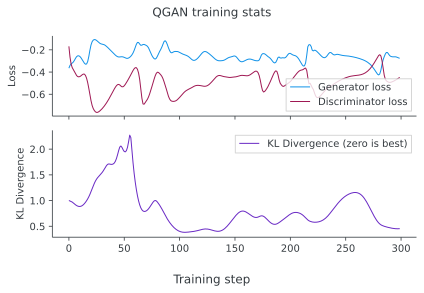

In [28]:
import matplotlib.pyplot as plt
fig, (loss, kl) = plt.subplots(2, sharex=True,
                               gridspec_kw={'height_ratios': [0.75, 1]},
                               figsize=(6,4))
fig.suptitle('QGAN training stats')
fig.supxlabel('Training step')
loss.plot(range(len(gloss)), gloss, label="Generator loss")
loss.plot(range(len(dloss)), dloss, label="Discriminator loss",
          color="C3")
loss.legend()
loss.set(ylabel='Loss')
kl.plot(range(len(kl_div)), kl_div, label="KL Divergence (zero is best)",
        color="C1")
kl.set(ylabel='KL Divergence')
kl.legend()
fig.tight_layout();

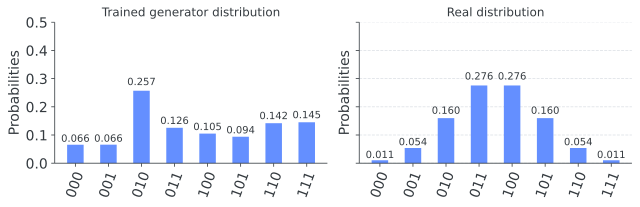

In [29]:
# Create test circuit with new parameters
gen_checkpoint_circuit = generator.bind_parameters(best_gen_params.numpy())
gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict()
real_prob_dict = Statevector(real_circuit).probabilities_dict() # constant
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,3))
plot_histogram(gen_prob_dict, ax=ax1)
ax1.set_title("Trained generator distribution")
plot_histogram(real_prob_dict, ax=ax2)
ax2.set_title("Real distribution")
ax2.set_ylim([0,.5])
fig.tight_layout()

Impressive!

<!-- ::: q-block.exercise -->

### Quick quiz

Drag the lines of pseudocode into their correct order to complete the program.

    q-drag-and-drop-code
        .line For n:=0 to N_EPOCHS do:
            .line For d:=0 to num_disc_steps do:
                .line Compute Z expectation value of d_out qubit when fed fake and real data
                .line.md Update $\vec{\theta}_{D}$ according to $\nabla_{\vec{\theta}_{D}}\text{Cost}_D(\class{theta-d}{\vec{\theta_D}},\class{theta-g}{\vec{\theta_G}})$ using ADAM optimizer
            .line For g:=0 to num_gen_steps do
                .line Compute Z-expectation value of d_out qubit when fed fake data
                .line.md Update $\vec{\theta}_{G}$ according to $\nabla_{\vec{\theta}_G}\text{Cost}_G(\class{theta-d}{\vec{\theta_D}},\class{theta-g}{\vec{\theta_G}})$ using ADAM optimizer
            .line Compute KL divergence between G and R
            .line If current KL divergence is the lowest yet do
                .line Save current generator weights

<!-- ::: -->

## Potential applications

The development of QGANs is still emerging, so there remains much more research to be done on potential applications. However, there is hope that QGANs will enable sampling and manipulation of classically intractable probability distributions (difficult to sample from classically).

One particularly interesting application of QGANs is efficient, approximate data loading. In order to see a quantum advantage in data processing - using, e.g., quantum amplitude estimation [6] — we need to load the input data onto a quantum state. However, loading classical data into a quantum circuit is often expensive, and generally even exponentially expensive [7, 8]. Therefore, the data loading complexity can easily impair any potential quantum advantage.

As shown in reference [4], QGANs offer an interesting approach to efficiently learn and load approximations of generic probability distributions, as demonstrated in this [tutorial](https://qiskit.org/documentation/machine-learning/tutorials/04_qgans_for_loading_random_distributions.html). Once the probability distribution is loaded into a quantum state, a quantum algorithm such as quantum amplitude estimation can process the data. As shown in this [tutorial](https://qiskit.org/documentation/tutorials/finance/10_qgan_option_pricing.html), this workflow may then be used to, e.g., price options with a potential quadratic quantum speedup.

Additionally, in quantum chemistry, quantum computers are believed to have an intrinsic advantage in being able to represent and manipulate correlated [fermionic](gloss:fermionic) states (molecules). A natural question one could ask is: given an adequate ansatz, could QGANs be used to generate new types of molecules that fit the mould of an inputted set of materials/molecules possibly obtained through VQE? That would involve extending QGANs into the conditional realm (inputting a conditional label to both the generator and discriminator, see [conditional GANs](https://arxiv.org/abs/1411.1784) but as of now, it remains an open question.

<!-- ::: q-block.exercise -->

### Try it

To extend the ideas you've just learned, create a QGAN to learn a 3 qubit normal distribution but with a classical discriminator. [Reference 4](https://arxiv.org/abs/1904.00043) will be helpful. You may use the same generator ansatz we've used above, but ensure the discriminator's neural network is adequately sized to match the quantum generator's power.

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

## References

<!-- vale QiskitTextbook.Spelling = NO -->

1. I. J. Goodfellow, J. Pouget-Abadie, M. Mirza, B. Xu, D.Warde-Farley, S. Ozair, A. Courville, and Y. Bengio, in *Proceedings of the 27th International Conference on Neural Information Processing Systems* (MIT Press, Cambridge, MA, 2014), Vol. 2, pp. 2672–2680, [arXiv:1406.2661](https://arxiv.org/abs/1406.2661).
2. P.-L. Dallaire-Demers, & N. Killoran, *Quantum generative adversarial networks,* Phys. Rev. A 98, 012324 (2018), [doi.org:10.1103/PhysRevA.98.012324](https://doi.org/10.1103/PhysRevA.98.012324), [arXiv:1804.08641](https://arxiv.org/abs/1804.08641)
3. S. Lloyd, & C. Weedbrook, *Quantum generative adversarial learning*. Phys. Rev. Lett. 121, 040502 (2018), [doi.org:10.1103/PhysRevLett.121.040502](https://doi.org/10.1103/PhysRevLett.121.040502), [arXiv:1804.09139](https://arxiv.org/abs/1804.09139)
4. C. Zoufal, A. Lucchi, and S. Woerner, *Quantum generative adversarial networks for learning and loading random distributions,* npj Quantum Information, 5, Article number: 103 (2019), [doi.org/10.1038/s41534-019-0223-2](https://doi.org/10.1038/s41534-019-0223-2), [arXiv:1904.00043](https://arxiv.org/abs/1904.00043)
5. J. Romero, A. Aspuru-Guzik, *Variational quantum generators: Generative adversarial quantum machine learning for continuous distributions* (2019), [arxiv.org:1901.00848](https://arxiv.org/abs/1901.00848)
6. Brassard, G., Hoyer, P., Mosca, M. & Tapp, A. *Quantum amplitude amplification and estimation*. Contemp. Math. 305, 53–74 (2002), [doi.org/10.1090/conm/305/05215](http://www.ams.org/books/conm/305/), [arXiv:quant-ph/0005055](https://arxiv.org/abs/quant-ph/0005055)
7. L. K. Grover. *Synthesis of quantum superpositions by quantum computation*. Phys. Rev. Lett., 85, (2000), [doi.org/10.1103/PhysRevLett.85.1334](https://link.aps.org/doi/10.1103/PhysRevLett.85.1334)
8. M. Plesch and ˇC. Brukner. *Quantum-state preparation with universal gate decompositions*. Phys. Rev. A, 83, (2010), [doi.org/10.1103/PhysRevA.83.032302](https://doi.org/10.1103/PhysRevA.83.032302)

In [30]:
# pylint: disable=unused-import
import qiskit.tools.jupyter
%qiskit_version_table